In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
data  = pd.read_csv('/content/IPL.csv')

In [15]:
data.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [16]:
data.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [17]:
# checking null values
data.isna().any()

id                 False
Season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [18]:
data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [19]:
data['id'].count()

756

In [23]:
data.iloc[data['win_by_runs'].max()]

id                             147
Season                    IPL-2009
city                     Centurion
date                    06-05-2009
team1              Deccan Chargers
team2               Mumbai Indians
toss_winner        Deccan Chargers
toss_decision                  bat
result                      normal
dl_applied                       0
winner             Deccan Chargers
win_by_runs                     19
win_by_wickets                   0
player_of_match          RG Sharma
venue              SuperSport Park
umpire1                  MR Benson
umpire2            HDPK Dharmasena
umpire3                        NaN
Name: 146, dtype: object

In [26]:
data.iloc[data['win_by_wickets'].max()]

id                                    11
Season                          IPL-2017
city                             Kolkata
date                          13-04-2017
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner        Kolkata Knight Riders
toss_decision                      field
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         8
player_of_match                SP Narine
venue                       Eden Gardens
umpire1                       A Deshmukh
umpire2                         NJ Llong
umpire3                              NaN
Name: 10, dtype: object

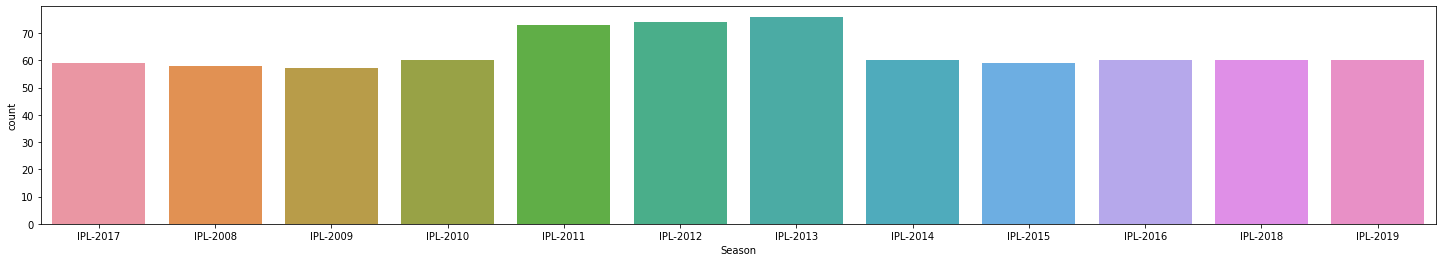

In [33]:
fig_dims = (25,4)
fig,ax = plt.subplots(figsize = fig_dims)
sns.countplot(x = "Season",ax=ax,data=data)
plt.show()

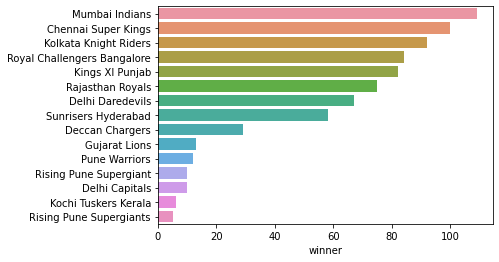

In [38]:
data1 = data.winner.value_counts()
sns.barplot(y=data1.index,x=data1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


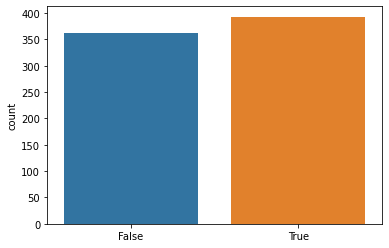

In [40]:
probability_of_toss_win = data['winner'] == data['toss_winner']
sns.countplot(probability_of_toss_win)

In [43]:
# which team wins per season
c=data.groupby('Season')['winner'].value_counts()
print(c)

Season    winner                     
IPL-2008  Rajasthan Royals               13
          Kings XI Punjab                10
          Chennai Super Kings             9
          Delhi Daredevils                7
          Mumbai Indians                  7
                                         ..
IPL-2019  Kings XI Punjab                 6
          Kolkata Knight Riders           6
          Sunrisers Hyderabad             6
          Rajasthan Royals                5
          Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64


In [49]:
# how many times they choose bat and fields
data['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

In [51]:
# man of the match
data['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

In [57]:
# which stadium played more matches
data['city'].value_counts()


Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64